# CLUBB Verification Test

## Component Being Tested
CLUBB (Cloud Layers Unified By Binormals), a parameterization of clouds and turbulence that is used in the E3SM v1 model for the representation of cloud macrophysics, shallow convection, and turbulence. 

## Purpose
Quantify the magnitude of clipping terms in CLUBB's 13 prognostic equations. 

## Description
The prognostic equations (i.e., time-evolution equations) that CLUBB solves in each grid cell contain a number of terms that do not correspond to any physical processes but are included for avoiding unphysical values or features in the discrete solution such as negative variances, correlation coefficients outside the range of [-1, 1], or artifitial extrema. 
For example, the equation describing the time evolution of $r_t'^{2}$, the subgrid variance of total water $r_t$ referred to as rtp2 in CLUBB's source code and model output, reads

\begin{equation}\begin{split}
\\ \frac {\partial \overline{r_t^{\prime2}}} {\partial t} &= -\overline{w} \frac{\partial \overline{r_t^{\prime2}}}{\partial z} - \frac {1}{\rho_s} \frac {\partial \rho_s \overline{w^{\prime} r_t^{\prime2}}}{\partial z} - 2 \overline {w^{\prime}r_t^{\prime}} \frac{\partial \overline{r_t}}{\partial z} - \frac{C_2}{\tau} \Bigl( \overline{r_t^{\prime2}} - r_{t,tol}^{2} \Bigl ) \\ &\quad + \frac{\partial}{\partial z} \Bigr [ ( K_{w2} + \upsilon_2) \frac{\partial}{\partial z}  \overline{r_t^{\prime2}} \Bigr ]  + \overline{\frac {\partial {r_t^{\prime2}}} {\partial t} \Bigr |_{mc}} + \frac {\partial \overline{r_t^{\prime
2}}} {\partial t} \Bigr |_{pd} + \frac {\partial \overline{r_t^{\prime2}}} {\partial t} \Bigr |_{cl} 
\end{split}\end{equation}

The terms on the right hand side are tendencies caused by the mean advection, turbulent advection, turbulent production, dissipation term 1, dissipation term 2, microphysics, respectively, and two clipping terms indicated with subscripts $pd$ and $cl$. 


The current version of CLUBB has three types of clipping term: 
- explicit, non-conservative clipping (denoted by subscript $cl$), 
- positive-definite conservative hole-filling scheme (subscript $pd$), and 
- monotonic flux limiter (subscript $mfl$).

Not all three types are relevant for all of CLUBB's equations.

In this verifcation test, the CLUBB stand-alone model is run for 6 model hours using the BOMEX (shallow convection) test case. We define the relative magnitude of a clipping term $F_{cl}$ of as 

\begin{equation}
F_{cl,rel} = \frac{ \sqrt{\sum_{i=1}^{I} \sum_{k=1}^{K} w_{k,i} (F_{cl,k,i}^2)}} 
         { max \Bigr (  \sum_{j = 1}^{J} \sqrt{\sum_{i}^{I} \sum_{k}^{K} w_{k,i} (F_{j,k,i}^2)}  \, \, \Bigr )}, 
\end{equation} 
with the weights $w_{k,i}$ being
\begin{equation}
w_{k,i} = \frac{m_{k,i}}{\sum_{k=1}^{K} m_{k,i}}, \quad m_{k,i} = \rho_{k,i}\Delta Z_{k,i},
\end{equation} 

where $m$ and $\Delta Z$ are the mass and geometical thickness of layer $k$ at time step $i$, and $\rho$ denotes air density. $j$ is the index of the *physical* terms. In other words, $F_{cl,rel}$ is the vertically integrated root-mean square magnitude of the clipping term $F_{cl}$ normalized by the largest magnitude of the physical terms. In the results shown below, the vertical integral covers the entire depth of the model atmosphere. The window of time averaging is either 0-3 h or 3-6 h after model initialization, with the former representing the spin-up phase and the latter being the quasi-equilibrium phase of a simulation.

------------




As the first step to designing a verification test, we present an initial evaluation of CLUBB's clipping terms that may serve as a good candidate for constructing a test for pass/fail metrics. 

The CLUBB single column model simulations were ran for the BOMEX cloud regime at various time step sizes for 6 hours and the clipping term magnitudes for CLUBB's 13 prognostic variables were quantified. 
\end{color}


A relative, unitless measure of the clipping terms was calculated that included normalizing their magnitudes with respect to the maximum physical term in each of CLUBB's prognostic budgets using root mean square (RMS) mass weighting and averaging over the first half (0-3hr) and second half (3-6hr) of the simulations. Therefore, the RMS-weighted, vertically-averaged, k to K, and time-averaged, i to I, clipping term, $F_{cl,rms}$, normalized by maximum physical term with RMS weighting was calculated as



## Discussion

As the first step to designing a verification test that provides a "pass" or "fail" result, the BOMEX case was run with a range of step sizes: 2 s, 12 s, 30 s, 60 s (default), 120 s, 300 s, and 600 s. The relative magnitudes of the clipping terms are shown in the figure below.
With the default step size of 60 s, the magnitude of the clipping terms are:
<span style="color:red">(give the numbers here)</span>.

Our current idea is to choose a threshold for each clipping term based on the results shown in the figure. Test simulations will be conducted with the default 60 s step size. For each clipping term, if the magnitude in a test simulation turns out to be smaller than the respective threshold, a "pass" is assigned to that particular term. An overall "pass" is issued when all terms are found to be smaller the corresponding thresholds.


## Results of Initial Evaluation

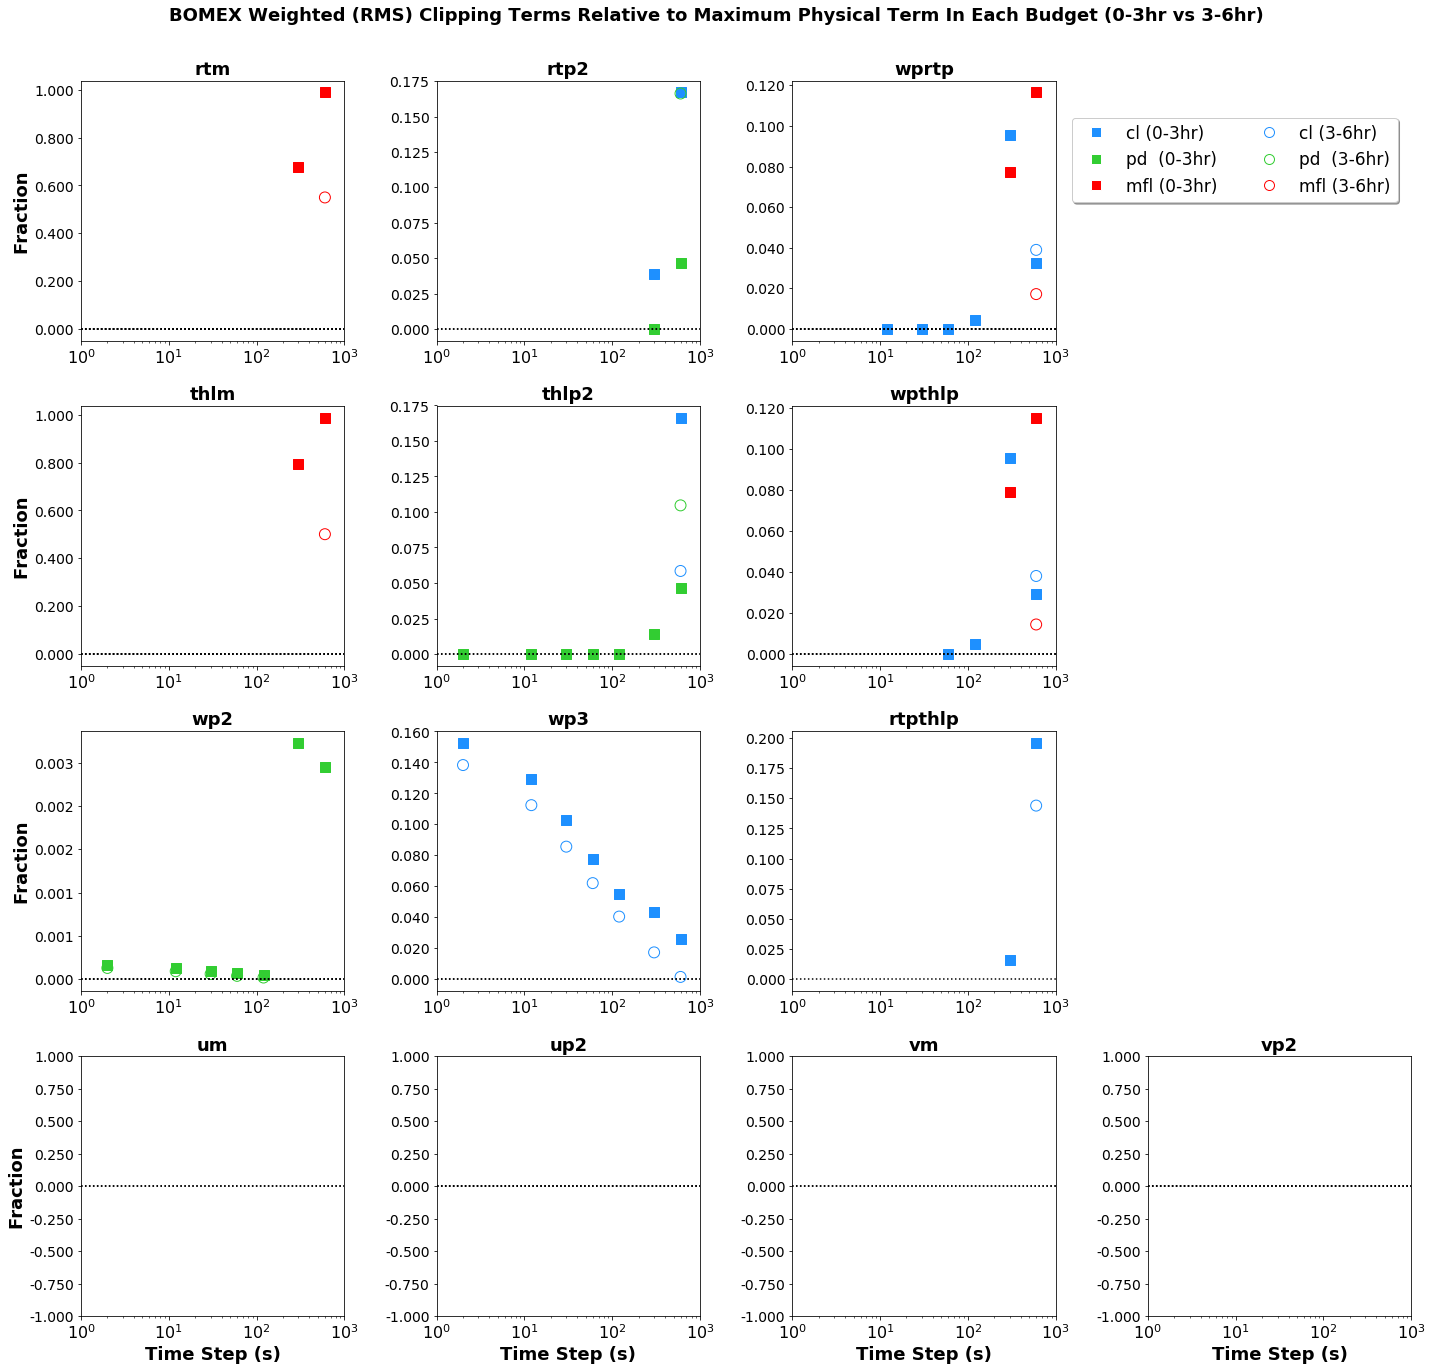

In [1]:
from IPython.display import display, Image
display(Image(filename='relative_clipping_rms_weighted_bomex.png'))

Figure 1: Relative magnitude of the clipping terms. Simulations were conducted for the BOMEX case. Markers represent the 0-3 hr time average, circle markers represent the 3-6 hr time average. The explicit clipping term is in blue, positive definite terms are in green, and monotonic flux limiter terms are in red. Values less than 10$^{−6}$ are considered insignificant and not plotted.